In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [2]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the ZIP file
uploaded = files.upload()

# Get the uploaded ZIP file name
zip_file_name = next(iter(uploaded))

# Step 2: Extract the ZIP file
zip_file_path = zip_file_name
extracted_dir_path = zip_file_name.split('.')[0]  # Directory name from ZIP file name without extension

# Create a directory to extract to
if not os.path.exists(extracted_dir_path):
    os.makedirs(extracted_dir_path)

# Extract the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print(f"Contents extracted to: {extracted_dir_path}")

# Verify the contents
os.listdir(extracted_dir_path)


Saving archive (4).zip to archive (4).zip
Contents extracted to: archive (4)


['images']

In [3]:
picture_size = 48
folder_path = "/content/archive (4)/images/images"

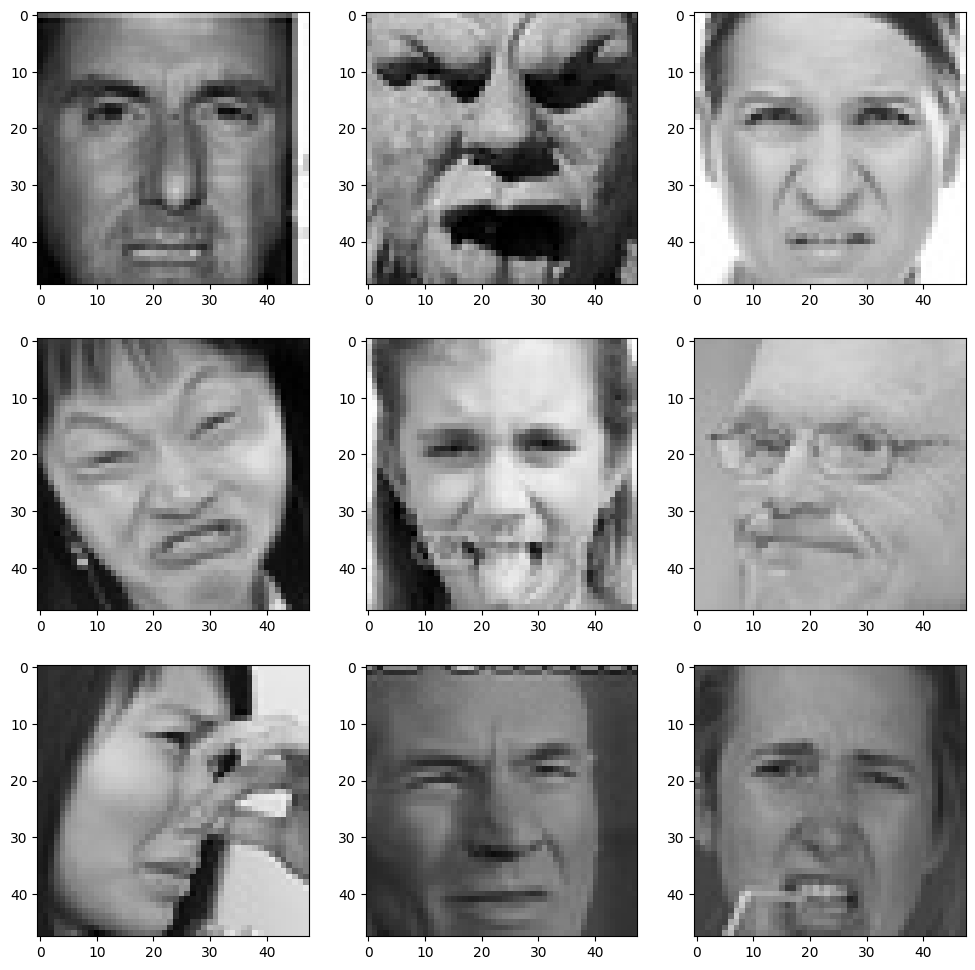

In [5]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/train/"+expression+"/"+
                  os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [6]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"/validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [7]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [8]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [9]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


<ipython-input-9-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


225/225 [==============================] - ETA: 0s - loss: 1.8145 - accuracy: 0.2989

225/225 [==============================] - 33s 92ms/step - loss: 1.8145 - accuracy: 0.2989 - val_loss: 1.7985 - val_accuracy: 0.3311 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.4715 - accuracy: 0.4337

225/225 [==============================] - 16s 72ms/step - loss: 1.4715 - accuracy: 0.4337 - val_loss: 1.7663 - val_accuracy: 0.3972 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.3025 - accuracy: 0.5007

225/225 [==============================] - 17s 73ms/step - loss: 1.3025 - accuracy: 0.5007 - val_loss: 1.2650 - val_accuracy: 0.5119 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.2110 - accuracy: 0.5382

225/225 [==============================] - 17s 73ms/step - loss: 1.2110 - accuracy: 0.5382 - val_loss: 1.2236 - val_accuracy: 0.5395 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - ETA: 0s - loss: 1.1469 - accuracy: 0.5636

225/225 [==============================] - 17s 75ms/step - loss: 1.1469 - accuracy: 0.5636 - val_loss: 1.1528 - val_accuracy: 0.5570 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - ETA: 0s - loss: 1.0909 - accuracy: 0.5859

225/225 [==============================] - 17s 74ms/step - loss: 1.0909 - accuracy: 0.5859 - val_loss: 1.1538 - val_accuracy: 0.5581 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - ETA: 0s - loss: 1.0489 - accuracy: 0.5983

225/225 [==============================] - 17s 73ms/step - loss: 1.0489 - accuracy: 0.5983 - val_loss: 1.1346 - val_accuracy: 0.5760 - lr: 0.0010
Epoch 8/48
225/225 [==============================] - ETA: 0s - loss: 0.9959 - accuracy: 0.6221

225/225 [==============================] - 17s 76ms/step - loss: 0.9959 - accuracy: 0.6221 - val_loss: 1.0825 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 9/48
225/225 [==============================] - ETA: 0s - loss: 0.9622 - accuracy: 0.6397

225/225 [==============================] - 17s 73ms/step - loss: 0.9622 - accuracy: 0.6397 - val_loss: 1.0961 - val_accuracy: 0.5949 - lr: 0.0010
Epoch 10/48
225/225 [==============================] - ETA: 0s - loss: 0.9235 - accuracy: 0.6489

225/225 [==============================] - 17s 74ms/step - loss: 0.9235 - accuracy: 0.6489 - val_loss: 1.2181 - val_accuracy: 0.5368 - lr: 0.0010
Epoch 11/48
225/225 [==============================] - ETA: 0s - loss: 0.8769 - accuracy: 0.6707Restoring model weights from the end of the best epoch: 8.



Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 17s 74ms/step - loss: 0.8769 - accuracy: 0.6707 - val_loss: 1.1209 - val_accuracy: 0.5822 - lr: 0.0010
Epoch 11: early stopping


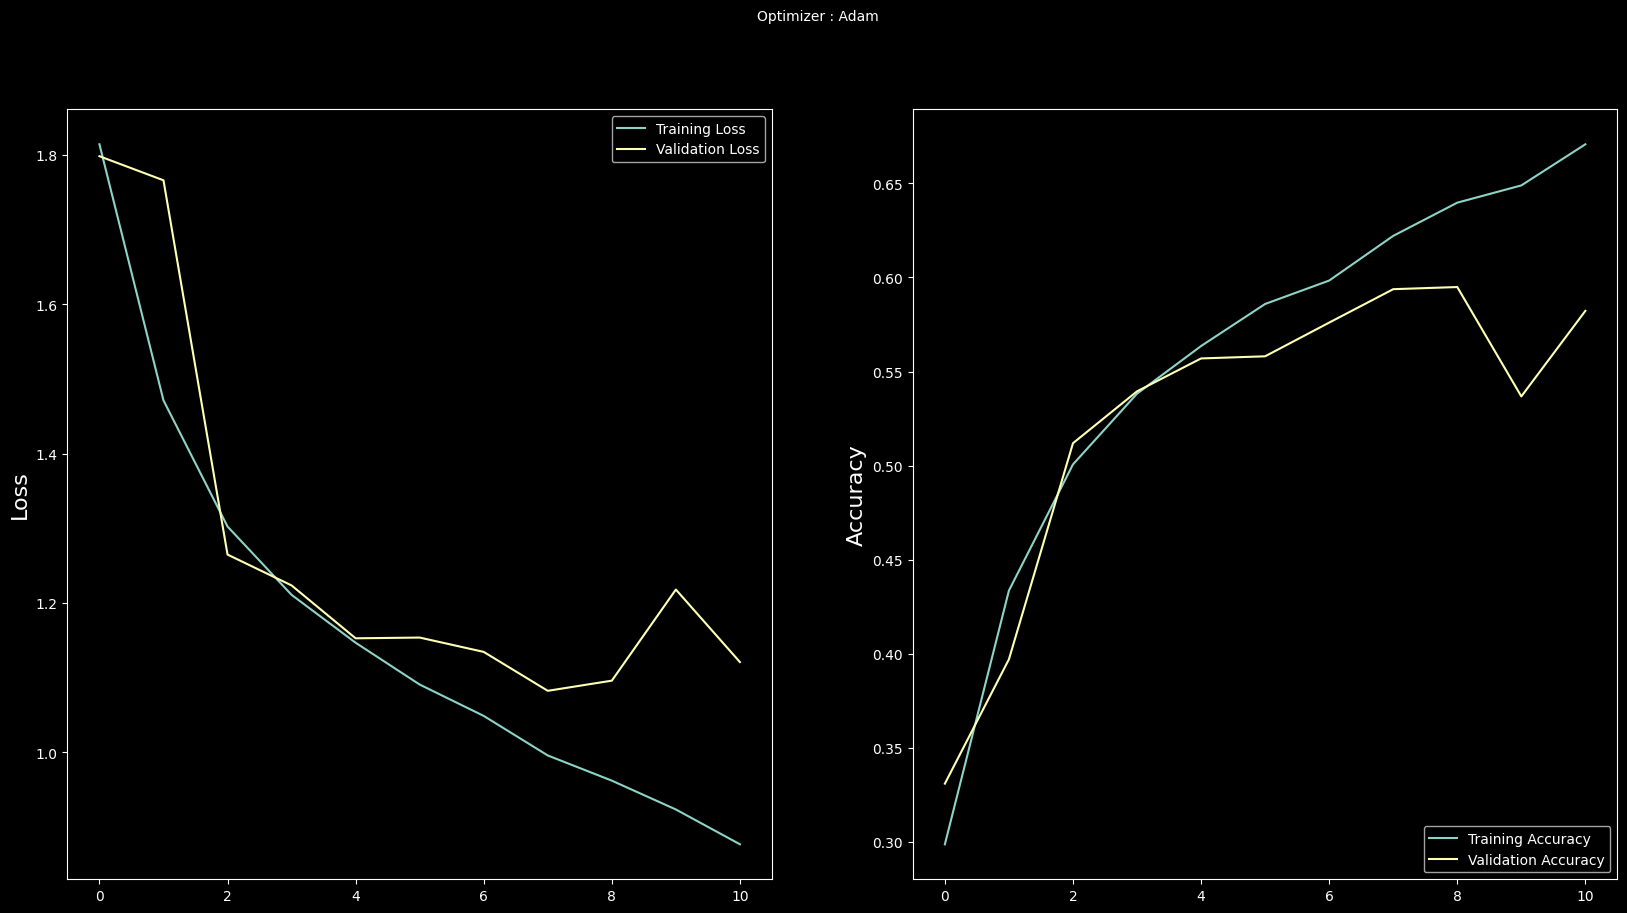

In [10]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()